In [1]:
# Import necessary libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Read dataframe in
df = pd.read_csv("../data/cloudworker_tasks_adjusted.csv")

# Let's examine the first couple of entries in the dataset
print(f'Dataframe shape - {df.shape}\n')

uniqueUsers = df['user.id'].unique()
print(f'Unique users within set - { uniqueUsers.size }\n')
print(f'Types of data within our set:\n{df.dtypes}\n')
df.head(n=10)

Dataframe shape - (3883, 15)

Unique users within set - 14

Types of data within our set:
platform.name                           object
user.id                                 object
task.id                                 object
task.monetary_reward_in_dollars        float64
task.assignable_hits_count             float64
task.requester_name                     object
task.estimate_duration_in_seconds        int64
total.labor.event_count                  int64
total.labor.duration_in_seconds          int64
working.labor.event_count                int64
working.labor.duration_in_seconds        int64
invisible.labor.event_count              int64
invisible.labor.duration_in_seconds      int64
adjusted.monetary_reward_in_dollars    float64
completed_task                           int64
dtype: object



,platform.name,user.id,task.id,task.monetary_reward_in_dollars,task.assignable_hits_count,task.requester_name,task.estimate_duration_in_seconds,total.labor.event_count,total.labor.duration_in_seconds,working.labor.event_count,working.labor.duration_in_seconds,invisible.labor.event_count,invisible.labor.duration_in_seconds,adjusted.monetary_reward_in_dollars,completed_task
0,MTURK,ae862298385abab2a0a1619f8cedef9d,3W9XHF7WGLV68SQR2YVUGGPI6QVTK3,2.00,1.0,HCI Lab,7200,52,326,5,35,47,291,2.090556,1
1,MTURK,ae862298385abab2a0a1619f8cedef9d,3KA7IJSNW54MTVXHF3TMHNX8OOTPBI,0.15,1.0,PickFu,720,2,30,2,30,0,0,0.156250,1
2,MTURK,ae862298385abab2a0a1619f8cedef9d,3UEBBGULPFPBKLKAVLPVYAEF6LSUFW,0.30,23.0,CB Lab,3600,36,31,12,2,24,29,0.302583,0
3,MTURK,ae862298385abab2a0a1619f8cedef9d,3MQY1YVHS35Y79MCYT1FYVKHDBQB2G,2.00,80.0,Tamara Berg,3600,23,45,17,39,6,6,2.025000,0
4,MTURK,ae862298385abab2a0a1619f8cedef9d,3E9VAUV7C0KFQYQSLVDQPISUFSBYA9,0.70,0.0,PP Group,14400,53,252,34,87,19,165,0.712250,1
5,MTURK,ae862298385abab2a0a1619f8cedef9d,307L9TDWJYSU5X3QAPDSGIUMBKC3ND,0.20,1.0,Kirk Wakefield,172800,50,115,29,8,21,107,0.200133,1
6,MTURK,ae862298385abab2a0a1619f8cedef9d,389A2A304OIIICG8DF1T1DF22WGC00,0.50,20.0,MSH University of Grenoble,1800,113,166,21,10,92,156,0.546111,0
7,MTURK,ae862298385abab2a0a1619f8cedef9d,3SNR5F7R91STS53HGDQSJBBU3NSIE8,0.20,40.0,SLS-6,1200,34,33,20,14,14,19,0.205500,0
8,MTURK,ae862298385abab2a0a1619f8cedef9d,375VMB7D4JK7T05MZHOWSEUJYFJDI0,0.50,0.0,PsychLabAtBC,1200,44,201,15,63,29,138,0.583750,1
9,MTURK,ae862298385abab2a0a1619f8cedef9d,3EQVJH0T40M4UDKGQD8XZ9P98S2THC,0.13,1.0,Tom Kramer,3600,51,52,19,4,32,48,0.131878,1


In [3]:
# As we can see we have a dataframe with approximately 3883 entries and just over 15 feautre columns within it
# We can see that one of those feature columns is our predictor which is completed_task which is either 0 - did not complete or 1 - did complete
# Let's graph some of the feautres and see what they look like

# First let's get some more information about our data
df.describe()

,task.monetary_reward_in_dollars,task.assignable_hits_count,task.estimate_duration_in_seconds,total.labor.event_count,total.labor.duration_in_seconds,working.labor.event_count,working.labor.duration_in_seconds,invisible.labor.event_count,invisible.labor.duration_in_seconds,adjusted.monetary_reward_in_dollars,completed_task
count,3883.000000,3883.000000,3.883000e+03,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,0.399683,1016.451713,9.632288e+03,197.545455,1469.697399,91.851404,360.423384,105.694051,1109.274015,0.610492,0.645892
std,0.896798,2202.351516,4.522715e+04,384.557432,5799.593581,215.920480,1611.744319,234.490680,5446.413915,2.425395,0.478304
min,0.000000,0.000000,6.000000e+01,2.000000,8.000000,2.000000,0.000000,0.000000,-17362.000000,0.000000,0.000000
25%,0.080000,0.000000,1.800000e+03,38.000000,77.000000,24.000000,33.000000,0.000000,26.500000,0.100000,0.000000
50%,0.150000,46.000000,3.600000e+03,62.000000,236.000000,42.000000,71.000000,22.000000,111.000000,0.153167,1.000000
75%,0.250000,1405.000000,7.200000e+03,230.000000,1132.500000,88.000000,224.000000,116.000000,696.500000,0.265833,1.000000
max,15.000000,36201.000000,1.814400e+06,11399.000000,81298.000000,10312.000000,67827.000000,5901.000000,78984.000000,98.154167,1.000000


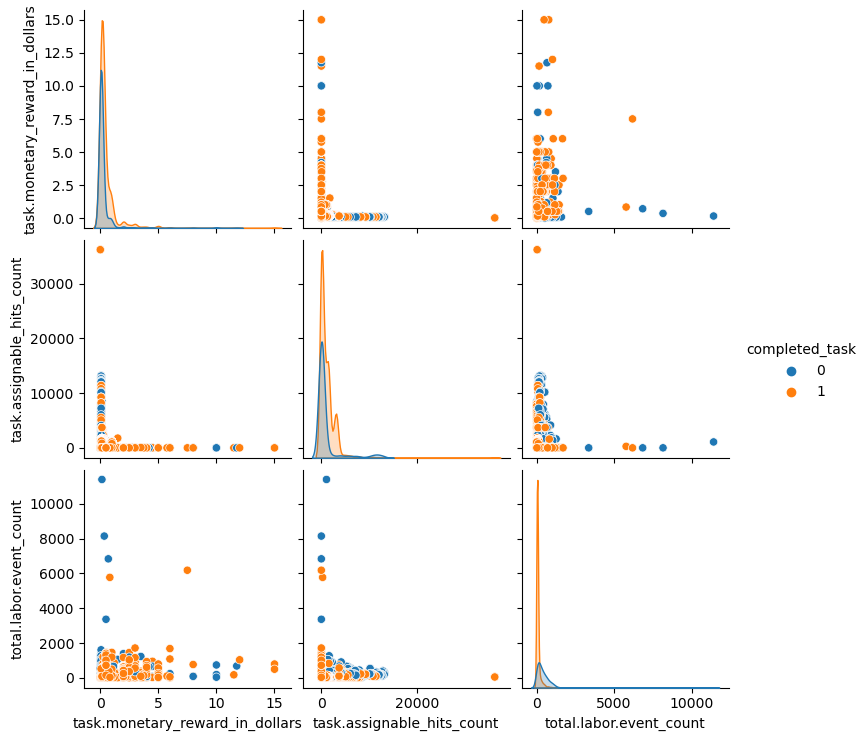

In [4]:
# When trying to predict if a person will complete a task or not, it's probably important to look at the following feautres:
# task.monetary_reward_in_dollars, task.assignable_hits_count, and total.labor.event_count
# Let's visually inspect those features

data_filter_features = df[['task.monetary_reward_in_dollars', 'task.assignable_hits_count', 'total.labor.event_count', 'completed_task']]

sns.pairplot(data_filter_features, hue = 'completed_task', kind = 'scatter', diag_kind='kde');

# Looks like we need some trimming to see a better visualization of our data

In [5]:
def trim_outliers(df, column, k):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - k * IQR
    upper = Q3 + k * IQR

    trimmed_df = df[(df[column] >= low) & (df[column] <= upper)]

    return trimmed_df

# Let's trim accordingly
t_df = trim_outliers(df, 'task.monetary_reward_in_dollars', k=2.5)
t_df = trim_outliers(t_df, 'task.assignable_hits_count', k=2.5)
t_df = trim_outliers(t_df, 'total.labor.event_count', k=2.5)

# Let's see the new shape of our dataset
print(f'Dataframe shape - {t_df.shape}\n')

# Look's like we were able to trim out 983 entries that we determined to be outliers

Dataframe shape - (2900, 15)



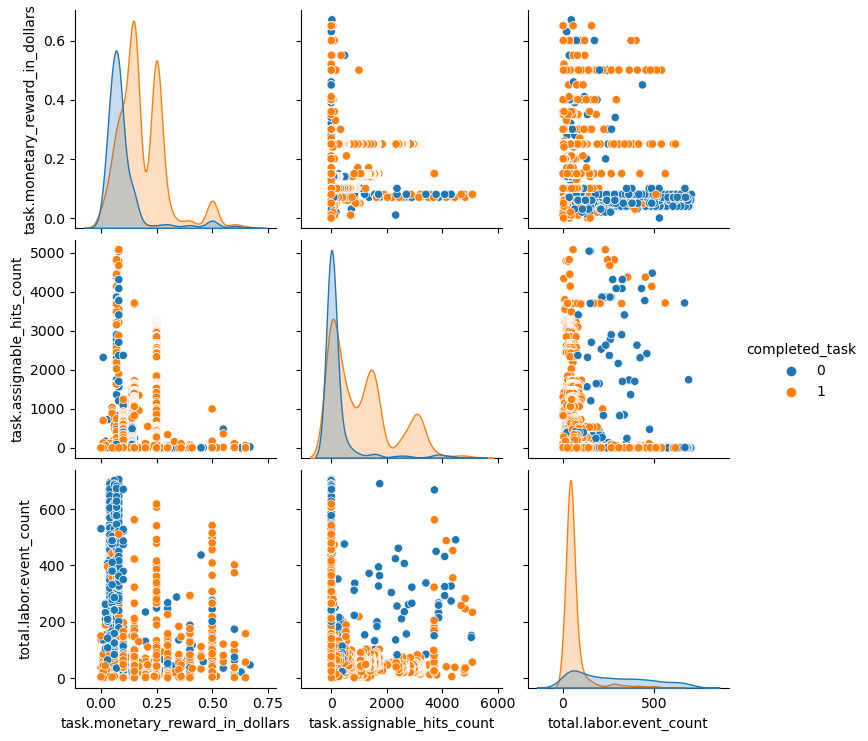

In [6]:
data_filter_features = t_df[['task.monetary_reward_in_dollars', 'task.assignable_hits_count', 'total.labor.event_count', 'completed_task']]

# Let's look at the features on the pairplot and see what we can see now in terms of feature vairbles in relation to the completition of the task
sns.pairplot(data_filter_features, hue = 'completed_task');

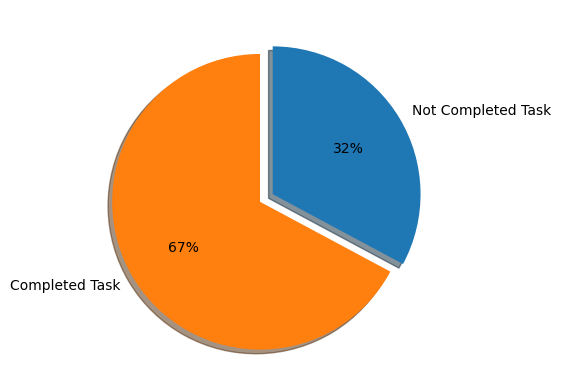

In [19]:
# Create a pie chart distribution for 'completed_task' field to show distribution.

# first find percentages
per_completed_task_true = \
    (data_filter_features.completed_task.value_counts()[1]) / \
    (data_filter_features.completed_task.value_counts()[0] + data_filter_features.completed_task.value_counts()[1])
per_completed_task_false = \
    (data_filter_features.completed_task.value_counts()[0]) / \
    (data_filter_features.completed_task.value_counts()[0] + data_filter_features.completed_task.value_counts()[1])

labels = 'Completed Task', 'Not Completed Task'
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Not Completed Task')
sizes = [per_completed_task_true, per_completed_task_false]
colors = ["#ff7f0f", "#1f77b4"] # orange, blue to match what's done in the pairplot.

# Build out a pie chart.
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1d%%', colors=colors,
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
# ax.set_title('Comparison of completed tasks versus not completed tasks.', fontsize=14)
plt.show()

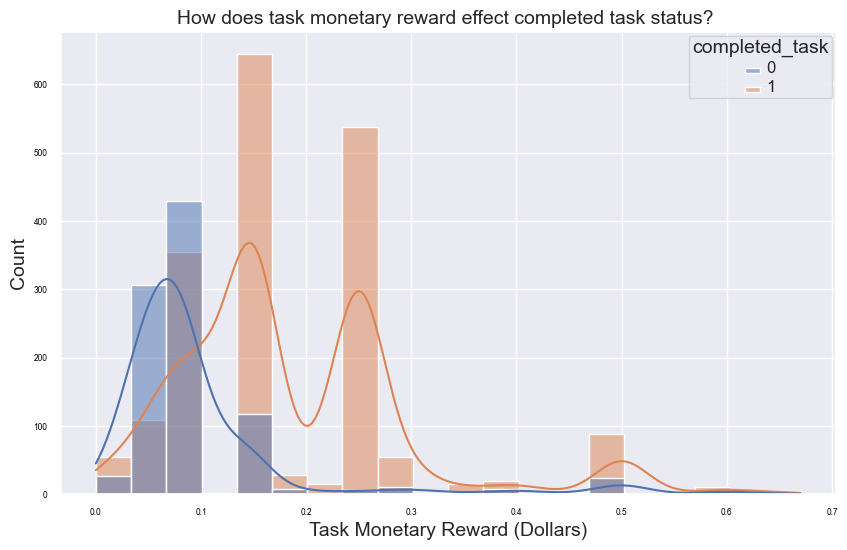

In [121]:
# sns.displot(
#     data=data_filter_features, x="task.monetary_reward_in_dollars", hue="completed_task", 
#     multiple="stack", kde=True, bins=12
# )
sns.set(color_codes=True)

fig, ax = plt.subplots(1, 1, figsize=(10,6))

# seaborn goes in first subplot
sns.set(font_scale=0.5)
ax = sns.histplot(
    data=data_filter_features, x="task.monetary_reward_in_dollars", hue="completed_task", 
    kde=True, bins=20
)
ax.set_title('How does task monetary reward effect completed task status? ', fontsize=14)
ax.set_xlabel('Task Monetary Reward (Dollars)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelcolor='black', labelsize='medium', width=3)

plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
plt.show()

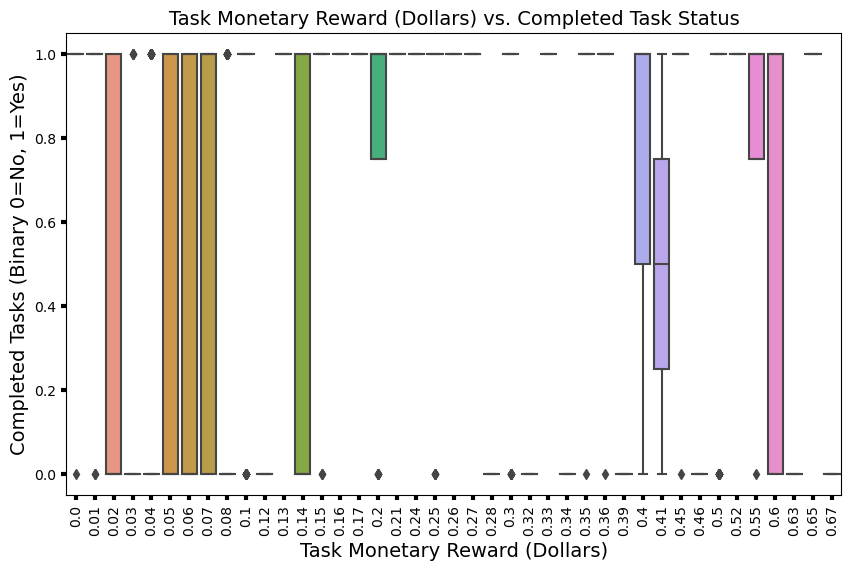

In [30]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.boxplot(x='task.monetary_reward_in_dollars',
                 y='completed_task', data=data_filter_features)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Task Monetary Reward (Dollars)', fontsize=14)
ax.set_ylabel('Completed Tasks (Binary 0=No, 1=Yes)', fontsize=14)
ax.set_title('Task Monetary Reward (Dollars) vs. Completed Task Status', fontsize=14)
ax.tick_params(labelcolor='black', labelsize='medium', width=3)
plt.show()


In [27]:
# Now that our data is trimmed let's put it into a k-nearest neighbors model

# Let's split our training and test data with our features
x_features = ['task.monetary_reward_in_dollars', 'task.assignable_hits_count', 'total.labor.event_count']
y_predictor = 'completed_task'
X_train, X_test, y_train, y_test = train_test_split(t_df[x_features], t_df[y_predictor], test_size=0.3, random_state=42)

In [28]:
# Feature scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the k-NN model
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9
Precision: 0.9377224199288257
Recall: 0.9101899827288429


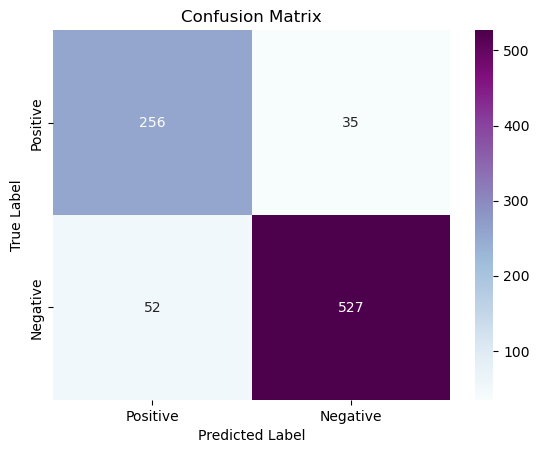

In [29]:
# Let's get more information about our model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
# 3 Cases of Interest

# This includes the 3 cases of interests input for features
custom_cases_x_test = [[0.50, 0.0, 53],
                       [0.15, 3704.0, 99],
                       [0.04, 2.0, 581]]

# This includes the 3 cases of interest actual value for completetion from the dataset
custom_cases_y_test = [[1, 1, 0]]

x_new = scaler.transform(custom_cases_x_test)

n_pred = knn_classifier.predict(x_new)

print(f"Did actually completed: {custom_cases_y_test[0]}")
print(f"Model prediction on completetion: {n_pred}\n")

Did actually completed: [1, 1, 0]
Model prediction on completetion: [1 1 0]



/Users/ztraboo/anaconda3/envs/cpsc6300/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
